**Team Members**

| Name   | ID |
| ----------- | ----------- |
| Feng Yunlin   | 19084103D     |


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
purchase = 20
maint_costs = [1, 2, 3, 6, 10]
sale_prices = [15, 12, 9, 5, 2]

In [3]:
for i in range(2,7):
    cost = purchase + sum(maint_costs[:i-1]) - sale_prices[i-2]
    if i != 6:
        cost += purchase + sum(maint_costs[:6-i]) - sale_prices[5-i]
    print(f'Sale at the beginning of year {i}:', cost)

Sale at the beginning of year 2: 33
Sale at the beginning of year 3: 28
Sale at the beginning of year 4: 28
Sale at the beginning of year 5: 33
Sale at the beginning of year 6: 40


In [4]:
nodes = [i for i in range(1, 7)]

edges = []
for gap in range(1,7):
    for src in range(1,7):
        if src + gap <=6:
            net = sum(maint_costs[:gap]) + purchase - sale_prices[gap-1]
            edges.append((src, src + gap, {'weight': net}))
            
for i in edges: print(i)

(1, 2, {'weight': 6})
(2, 3, {'weight': 6})
(3, 4, {'weight': 6})
(4, 5, {'weight': 6})
(5, 6, {'weight': 6})
(1, 3, {'weight': 11})
(2, 4, {'weight': 11})
(3, 5, {'weight': 11})
(4, 6, {'weight': 11})
(1, 4, {'weight': 17})
(2, 5, {'weight': 17})
(3, 6, {'weight': 17})
(1, 5, {'weight': 27})
(2, 6, {'weight': 27})
(1, 6, {'weight': 40})


In [5]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [6]:
print("Path:", nx.shortest_path(G, nodes[0], nodes[-1], weight='weight'))
print("Length:", nx.shortest_path_length(G, nodes[0], nodes[-1], weight='weight'))

Path: [1, 3, 6]
Length: 28


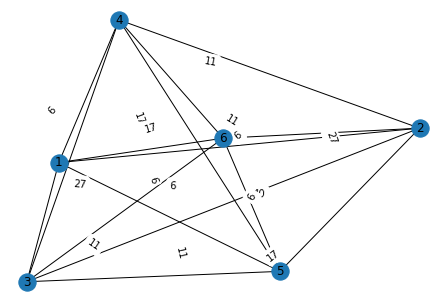

In [7]:
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "weight") # set edge label
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels) # draw edges
plt.show()

**Q1:**

Answer is shown in the output of Cell 3 (in thousand).

**Q2**

* Nodes: node i (1<=i<=6) represents *start of the current year*
* Edges: edge i,j (1<=i<=6, i<j) reprents the fact that *a car is used from year i to year j*. That is, a car is bought at the beginning of year i and traded-in at the beginning of year j. The length signifies *net cost* of this operation.

**Q3**

As shown above, (one of) the shortest path is `1 -> 3 -> 6`, the length of which is 28.

**Q4**

A path in this graph represents a saving strategy. The shortest path represents the strategy costs least money for the next five years. Path `1 -> 3 -> 6` indicates that we should *trade-in the car at the start of year 3*.

Path cost from `node 1` to `node 6` represents net cost incurred in the next five years. Since the path length is denoted in thousand, number `28` indicates that the lowest cost incurred is `28000`.